# 준비

<AxesSubplot:title={'center':'한글폰트 설정'}>

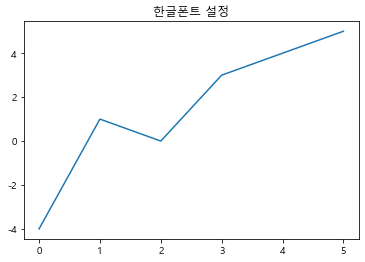

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rc("font", family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-4,1,0,3,4,5]).plot(title='한글폰트 설정')

In [79]:
df= pd.read_csv('C:/Users/zhddl/data/서울특별시 사회복지시설 목록.csv', encoding='CP949')

# 데이터 분석

In [80]:
df.head()

,시설명,시설코드,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구코드,시군구명,시설주소
0,서울꽃동네신내노인요양원,A0001,(노인) 노인요양시설,노인의료복지시설,자치구,최은숙,1126000000,중랑구,서울특별시 중랑구 신내로 194
1,청운양로원,A0002,(노인) 양로시설,노인주거복지시설,자치구,이종명,1111000000,종로구,서울특별시 종로구 비봉길 76 (구기동)
2,청운노인요양원,A0003,(노인) 노인요양시설,노인의료복지시설,자치구,이종후,1111000000,종로구,서울특별시 종로구 비봉길 76 (구기동)
3,홍파양로원,A0004,(노인) 양로시설,노인주거복지시설,자치구,김우리,1135000000,노원구,서울특별시 노원구 동일로248길 30 (상계동)
4,천사노인요양원,A0007,(노인) 노인요양시설,노인의료복지시설,자치구,김샛별,1150000000,강서구,서울특별시 강서구 강서로45다길 30-22


In [81]:
df.tail()

,시설명,시설코드,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구코드,시군구명,시설주소
3096,용산구장애인가족지원센터,Z6291,(장애인) (기타)장애인복지시설,장애인기타,자치구,송인수,1117000000,용산구,서울특별시 용산구 서빙고로 245 2층 (서빙고동 용산구장애인커뮤니티센터)
3097,강감찬관악종합사회복지관,Z6294,(일반) 사회복지관,일반사회복지시설,자치구,한미경,1162000000,관악구,서울특별시 관악구 양녕로74 (봉천동)
3098,종로발달장애인평생교육센터,Z6295,(장애인) (기타)장애인복지시설,장애인기타,자치구,신건철,1111000000,종로구,서울특별시 종로구 종로17길 8 (종로2가)
3099,영등포구 발달장애인평생교육센터,Z6300,(장애인) (기타)장애인복지시설,장애인기타,자치구,서성진,1156000000,영등포구,서울특별시 영등포구 영등포로 146 (당산동1가)
3100,미미위역삼 발달장애인평생교육센터,Z6325,(장애인) (기타)장애인복지시설,장애인기타,자치구,김미현,1168000000,강남구,서울특별시 강남구 논현로86길 21 2층 (역삼동)


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3101 entries, 0 to 3100
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   시설명            3101 non-null   object
 1   시설코드           3101 non-null   object
 2   시설종류명(시설유형)    3101 non-null   object
 3   시설종류상세명(시설종류)  3101 non-null   object
 4   자치구(시)구분       3101 non-null   object
 5   시설장명           3096 non-null   object
 6   시군구코드          3101 non-null   int64 
 7   시군구명           3101 non-null   object
 8   시설주소           3095 non-null   object
dtypes: int64(1), object(8)
memory usage: 218.2+ KB


In [83]:
df.dtypes

시설명              object
시설코드             object
시설종류명(시설유형)      object
시설종류상세명(시설종류)    object
자치구(시)구분         object
시설장명             object
시군구코드             int64
시군구명             object
시설주소             object
dtype: object

# 정리

## 컬럼 삭제

In [84]:
df= df.drop(['시설코드','시군구코드'], axis=1)
df.head()

,시설명,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구명,시설주소
0,서울꽃동네신내노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,최은숙,중랑구,서울특별시 중랑구 신내로 194
1,청운양로원,(노인) 양로시설,노인주거복지시설,자치구,이종명,종로구,서울특별시 종로구 비봉길 76 (구기동)
2,청운노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,이종후,종로구,서울특별시 종로구 비봉길 76 (구기동)
3,홍파양로원,(노인) 양로시설,노인주거복지시설,자치구,김우리,노원구,서울특별시 노원구 동일로248길 30 (상계동)
4,천사노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,김샛별,강서구,서울특별시 강서구 강서로45다길 30-22


## 시군구명 정리

In [85]:
df['시군구명'].value_counts()

노원구      192
강서구      189
송파구      178
은평구      168
중랑구      161
도봉구      151
관악구      150
강동구      149
양천구      140
강북구      138
구로구      135
성북구      129
강남구      126
금천구      120
영등포구     119
동작구      113
서대문구     109
동대문구     104
광진구       95
마포구       94
서초구       85
성동구       80
종로구       66
용산구       54
중구        45
서울특별시     11
Name: 시군구명, dtype: int64

In [86]:
# 시군구명에 있는 서울특별시들 확인

df_del= df[df['시군구명'].str.contains('서울')]
df_del

,시설명,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구명,시설주소
495,한국아동복지시설연합회,(아동) 아동양육시설,아동복지시설,자치구,성준경,서울특별시,서울특별시 용산구 갈월동 용산빌딩
1508,서울특별시립장애인영농직업재활시설,(장애인) 장애인보호작업장,장애인직업재활시설,자치구,장경언,서울특별시,경기도 남양주시 진접읍 양진로725
1581,서울시립영보자애원,(노숙인등) 노숙인요양시설,노숙인등생활시설,자치구,남숙자,서울특별시,경기도 용인시 처인구 이원로 483-0 .이동면 서울특별시립영보자애원
1663,서울시립영보정신요양원,(정신보건) 정신요양시설,정신요양시설,자치구,정미현,서울특별시,경기 용인시 처인구 이동면 이원로483
1688,애림원,(노인) 양로시설,노인주거복지시설,자치구,이상순,서울특별시,경기도 시흥시 동서로 895-6 (물왕동)
1734,행복이가득한집2호,(장애인) 장애인공동생활가정,장애인거주시설,자치구,김세룡,서울특별시,서울특별시 강서구 월정로18길 20401 (화곡동)(화곡동)
1860,(사)굿하트데이케어센터,(노인) 재가노인복지시설,재가노인복지시설,자치구,길준영,서울특별시,서울특별시 동작구 상도로 121영진빌딩 4층(상도동) (상도동)
1966,서울시립 영보노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,김재성,서울특별시,경기도 용인시 처인구 이동면 이원로483
2136,서울시학대피해노인전용쉼터,(노인) 노인보호전문기관,노인보호전문기관,자치구,손세영,서울특별시,서울특별시 도봉구 도봉로108길 83-5 301호 (창동)
2858,서울시건강가정지원센터,(건강가정) 건강가정지원센터,건강가정지원센터,자치구,계선자,서울특별시,서울특별시 중구 소파로4길 6 (예장동)(예장동)


In [87]:
# 경기도 제거

df= df.drop([1508,1581,1663,1688,1966], axis=0)
df.reset_index(inplace=True, drop=True)
df[df['시군구명'].str.contains('서울')]

,시설명,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구명,시설주소
495,한국아동복지시설연합회,(아동) 아동양육시설,아동복지시설,자치구,성준경,서울특별시,서울특별시 용산구 갈월동 용산빌딩
1730,행복이가득한집2호,(장애인) 장애인공동생활가정,장애인거주시설,자치구,김세룡,서울특별시,서울특별시 강서구 월정로18길 20401 (화곡동)(화곡동)
1856,(사)굿하트데이케어센터,(노인) 재가노인복지시설,재가노인복지시설,자치구,길준영,서울특별시,서울특별시 동작구 상도로 121영진빌딩 4층(상도동) (상도동)
2131,서울시학대피해노인전용쉼터,(노인) 노인보호전문기관,노인보호전문기관,자치구,손세영,서울특별시,서울특별시 도봉구 도봉로108길 83-5 301호 (창동)
2853,서울시건강가정지원센터,(건강가정) 건강가정지원센터,건강가정지원센터,자치구,계선자,서울특별시,서울특별시 중구 소파로4길 6 (예장동)(예장동)
3057,서울시정신보건센터,(정신보건) 재활훈련시설-주간재활시설,정신재활시설,자치구,이명수,서울특별시,서울특별시 강남구 봉은사로 21길 6(논현동) 5-7층


In [88]:
# 서울 시군구명 변경... 하...........

df.loc[df.시설명 == '한국아동복지시설연합회', ('시군구명')] = '용산구'
df.loc[df.시설명 == '행복이가득한집2호', ('시군구명')] = '강서구'
df.loc[df.시설명 == '(사)굿하트데이케어센터', ('시군구명')] = '동작구'
df.loc[df.시설명 == '서울시학대피해노인전용쉼터', ('시군구명')] = '도봉구'
df.loc[df.시설명 == '서울시건강가정지원센터', ('시군구명')] = '중구'
df.loc[df.시설명 == '서울시정신보건센터', ('시군구명')] = '강남구'

In [89]:
# 확인
df['시군구명'].value_counts()

노원구     192
강서구     190
송파구     178
은평구     168
중랑구     161
도봉구     152
관악구     150
강동구     149
양천구     140
강북구     138
구로구     135
성북구     129
강남구     127
금천구     120
영등포구    119
동작구     114
서대문구    109
동대문구    104
광진구      95
마포구      94
서초구      85
성동구      80
종로구      66
용산구      55
중구       46
Name: 시군구명, dtype: int64

## 요약하고 확인

In [90]:
df[['시군구명','시설종류상세명(시설종류)']]

,시군구명,시설종류상세명(시설종류)
0,중랑구,노인의료복지시설
1,종로구,노인주거복지시설
2,종로구,노인의료복지시설
3,노원구,노인주거복지시설
4,강서구,노인의료복지시설
...,...,...
3091,용산구,장애인기타
3092,관악구,일반사회복지시설
3093,종로구,장애인기타
3094,영등포구,장애인기타


In [91]:
df['시설종류상세명(시설종류)'].describe()

count         3096
unique          34
top       재가노인복지시설
freq           661
Name: 시설종류상세명(시설종류), dtype: object

In [92]:
df['시설종류상세명(시설종류)'].value_counts()

재가노인복지시설       661
아동복지시설         648
노인의료복지시설       528
장애인거주시설        274
장애인지역사회재활시설    234
장애인직업재활시설      138
정신재활시설         110
일반사회복지시설       100
노인여가복지시설        97
자활시설            31
한부모가족복지시설       27
노인주거복지시설        26
노숙인등생활시설        25
건강가정지원센터        23
다문화가족복지시설       23
장애인기타           22
건강기타            22
정신보건기타          20
노인일자리지원기관       19
노숙인등이용시설        12
노인기타            11
기타시설            10
성매매피해지원시설        7
여성기타             7
장애인의료재활시설        6
노인보호전문기관         5
정신요양시설           2
보육시설             2
영유아기타            1
결핵한센시설           1
한부모가족기타          1
청소년복지시설          1
장애인생산품판매시설       1
다문화가족기타          1
Name: 시설종류상세명(시설종류), dtype: int64

In [93]:
df['시설종류명(시설유형)'].value_counts()

(노인) 재가노인복지시설        661
(아동) 지역아동센터          433
(노인) 노인요양공동생활가정      308
(노인) 노인요양시설          220
(장애인) 장애인공동생활가정      182
                    ... 
(노숙인등) 노숙인급식시설         1
(한부모가족) 한부모가족지원센터      1
(여성) 대안교육위탁기관          1
(장애인) 점자도서관            1
(장애인) 장애인생산품판매시설       1
Name: 시설종류명(시설유형), Length: 95, dtype: int64

<AxesSubplot:>

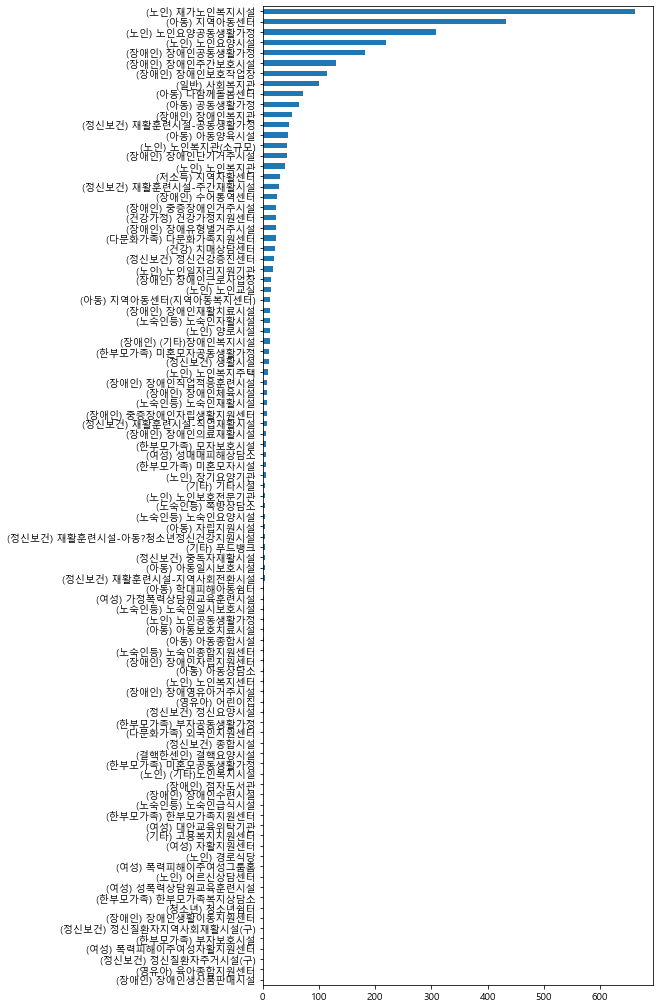

In [94]:
h= df['시설종류명(시설유형)'].value_counts()
h.sort_values().plot.barh(figsize=(7,18))

<AxesSubplot:>

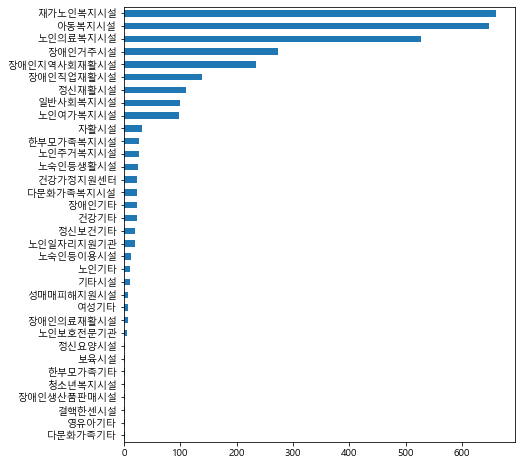

In [95]:
#
n= df['시설종류상세명(시설종류)'].value_counts()
n.sort_values().plot.barh(figsize=(7,8))

# 시각화

<AxesSubplot:xlabel='시군구명', ylabel='count'>

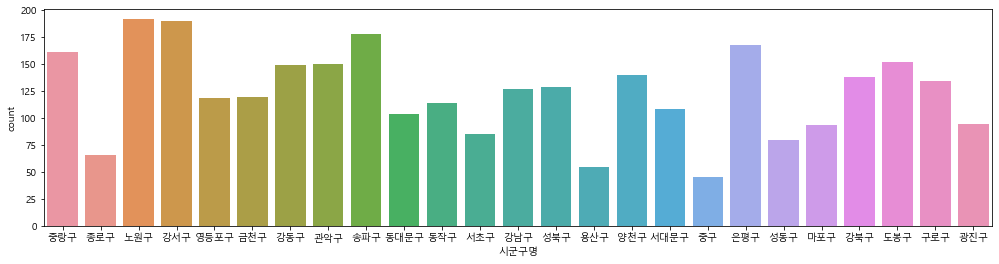

In [96]:
plt.figure(figsize=(17,4))
sns.countplot(data=df,x='시군구명')

## 서브셋

In [97]:
df_old= df[df['시설종류명(시설유형)'].str.contains('노인')]
df_old

,시설명,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구명,시설주소
0,서울꽃동네신내노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,최은숙,중랑구,서울특별시 중랑구 신내로 194
1,청운양로원,(노인) 양로시설,노인주거복지시설,자치구,이종명,종로구,서울특별시 종로구 비봉길 76 (구기동)
2,청운노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,이종후,종로구,서울특별시 종로구 비봉길 76 (구기동)
3,홍파양로원,(노인) 양로시설,노인주거복지시설,자치구,김우리,노원구,서울특별시 노원구 동일로248길 30 (상계동)
4,천사노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,김샛별,강서구,서울특별시 강서구 강서로45다길 30-22
...,...,...,...,...,...,...,...
3032,종로시니어클럽,(노인) 노인일자리지원기관,노인일자리지원기관,자치구,전석달,종로구,서울특별시 종로구 숭인동2길 28(숭인동)
3036,강서구치매지원센터,(노인) (기타)노인복지시설,노인기타,자치구,정지향,강서구,서울특별시 강서구 화곡로 371경향교회회관 3층
3070,은평시니어클럽,(노인) 노인일자리지원기관,노인일자리지원기관,자치구,조범기,은평구,서울특별시 은평구 응암로21길 10
3075,우리마포시니어클럽,(노인) 노인일자리지원기관,노인일자리지원기관,자치구,최철호,마포구,서울특별시 마포구 동교로8길 582층 사무실 (합정동)


In [98]:
df_chi= df[df['시설종류명(시설유형)'].str.contains('아동')]
df_chi

,시설명,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구명,시설주소
456,구세군서울후생원,(아동) 아동양육시설,아동복지시설,자치구,김호규,서대문구,서울특별시 서대문구 독립문로8길 41(영천동)
457,남산원,(아동) 아동양육시설,아동복지시설,자치구,박흥식,중구,서울특별시 중구 소파로2길 31남산원
458,송죽원,(아동) 아동양육시설,아동복지시설,자치구,권명심,서대문구,서울특별시 서대문구 송죽길 23
459,강동꿈마을,(아동) 아동양육시설,아동복지시설,자치구,최은미,강동구,서울특별시 강동구 천호대로186길 21 (둔촌동)
460,리라아동복지관,(아동) 아동양육시설,아동복지시설,자치구,김두식,중구,경기도 안성시 용소길 65-0리라아동복지관
...,...,...,...,...,...,...,...
2800,신금호아이꿈누리터(성동11호점 우리동네키움센터),(아동) 다함께돌봄센터,아동복지시설,자치구,이지숙,성동구,서울특별시 성동구 행당로 6103호 (금호동1가)
2801,송파희망세상지역아동센터,(아동) 지역아동센터,아동복지시설,자치구,이정훈,송파구,서울특별시 송파구 오금로64길 4 2층 (거여동)
2846,조대봉님,(아동) 아동양육시설,아동복지시설,자치구,조대봉,서초구,서울특별시 서초구 방배로20길 45층방배동
2848,국가복지정보 아동시설,(아동) 아동양육시설,아동복지시설,자치구,홍길똥,서초구,서울특별시 서초구 방배로20길 4원등빌딩 5층방배동


In [99]:
df_dis= df[df['시설종류명(시설유형)'].str.contains('장애인')]
df_dis

,시설명,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구명,시설주소
190,송파구방이복지관,(장애인) 장애인복지관,장애인지역사회재활시설,자치구,김진숙,송파구,서울특별시 송파구 오금로11길 68
197,서울시각장애인복지관,(장애인) 장애인복지관,장애인지역사회재활시설,자치구,허경아,송파구,서울특별시 송파구 삼학사로19길 27
198,서울시립발달장애인복지관,(장애인) 장애인복지관,장애인지역사회재활시설,자치구,최선자,동작구,서울특별시 동작구 여의대방로20길 33-0395(보라매공원내)
203,청음복지관,(장애인) 장애인복지관,장애인지역사회재활시설,자치구,심계원,강남구,서울특별시 강남구 봉은사로50길 6
204,마포장애인종합복지관,(장애인) 장애인복지관,장애인지역사회재활시설,자치구,김명규,마포구,서울특별시 마포구 성산로4길 353층(마포장애인종합복지관)(성산동)
...,...,...,...,...,...,...,...
3090,서대문장애인가족지원센터,(장애인) (기타)장애인복지시설,장애인기타,자치구,정희경,서대문구,서울특별시 서대문구 세검정로 78-19 1층 (홍제동)
3091,용산구장애인가족지원센터,(장애인) (기타)장애인복지시설,장애인기타,자치구,송인수,용산구,서울특별시 용산구 서빙고로 245 2층 (서빙고동 용산구장애인커뮤니티센터)
3093,종로발달장애인평생교육센터,(장애인) (기타)장애인복지시설,장애인기타,자치구,신건철,종로구,서울특별시 종로구 종로17길 8 (종로2가)
3094,영등포구 발달장애인평생교육센터,(장애인) (기타)장애인복지시설,장애인기타,자치구,서성진,영등포구,서울특별시 영등포구 영등포로 146 (당산동1가)


## 구별 시설 수

In [100]:
df_t= df.groupby(['시군구명','시설종류상세명(시설종류)'])['자치구(시)구분'].count()
df_t.loc['노원구']

시설종류상세명(시설종류)
건강가정지원센터        1
건강기타            1
기타시설            1
노인여가복지시설        4
노인의료복지시설       30
노인일자리지원기관       1
노인주거복지시설        2
다문화가족복지시설       1
아동복지시설         28
영유아기타           1
일반사회복지시설        9
자활시설            3
장애인거주시설        23
장애인기타           1
장애인지역사회재활시설    27
장애인직업재활시설       9
재가노인복지시설       44
정신보건기타          1
정신재활시설          4
한부모가족복지시설       1
Name: 자치구(시)구분, dtype: int64

In [101]:
t= df.groupby(['시군구명','시설종류상세명(시설종류)'])['자치구(시)구분'].count()
t

시군구명  시설종류상세명(시설종류)
강남구   건강가정지원센터          1
      건강기타              1
      기타시설              2
      노숙인등생활시설          1
      노인기타              1
                       ..
중랑구   장애인지역사회재활시설       3
      장애인직업재활시설         7
      재가노인복지시설         48
      정신보건기타            1
      정신재활시설            6
Name: 자치구(시)구분, Length: 461, dtype: int64

<AxesSubplot:ylabel='시설종류상세명(시설종류)'>

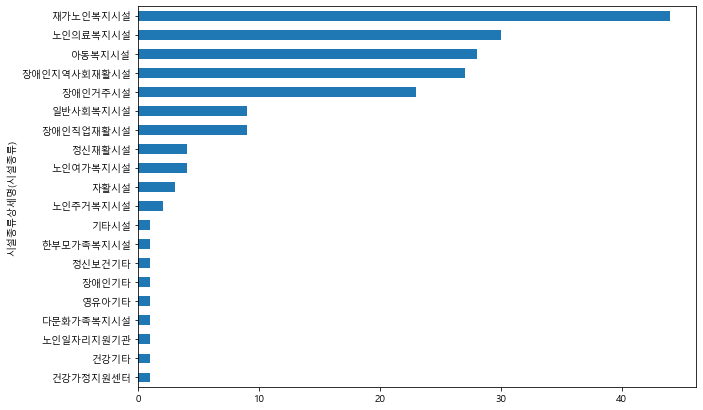

In [102]:
# 노인 관련 시설이 가장 많다.

t.sort_values().loc['노원구'].plot.barh(figsize=(10,7))

<AxesSubplot:ylabel='시설종류상세명(시설종류)'>

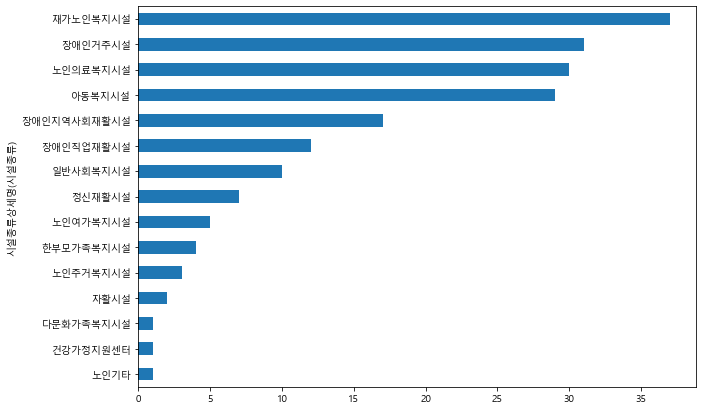

In [103]:
# 노원구와는 다르게 노인복지시설 다음으로 장애인 거주시설이 많다.

t.sort_values().loc['강서구'].plot.barh(figsize=(10,7))

<AxesSubplot:ylabel='시설종류상세명(시설종류)'>

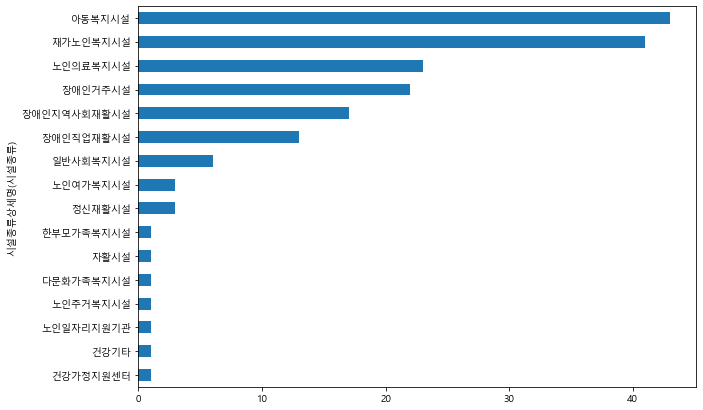

In [121]:
t.sort_values().loc['송파구'].plot.barh(figsize=(10,7))

<AxesSubplot:ylabel='시설종류상세명(시설종류)'>

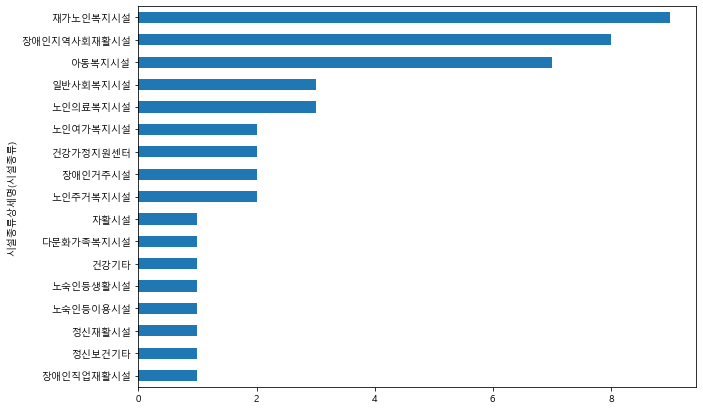

In [120]:
# 제일 시설 수가 적은 중구를 확인해보니 이곳도 역시 노인 복지시설이 많다.

t.sort_values().loc['중구'].plot.barh(figsize=(10,7))

In [105]:
t_re= t.reset_index()
df_t= t_re.rename(columns={'자치구(시)구분':'시설수'})
df_t.head()

,시군구명,시설종류상세명(시설종류),시설수
0,강남구,건강가정지원센터,1
1,강남구,건강기타,1
2,강남구,기타시설,2
3,강남구,노숙인등생활시설,1
4,강남구,노인기타,1


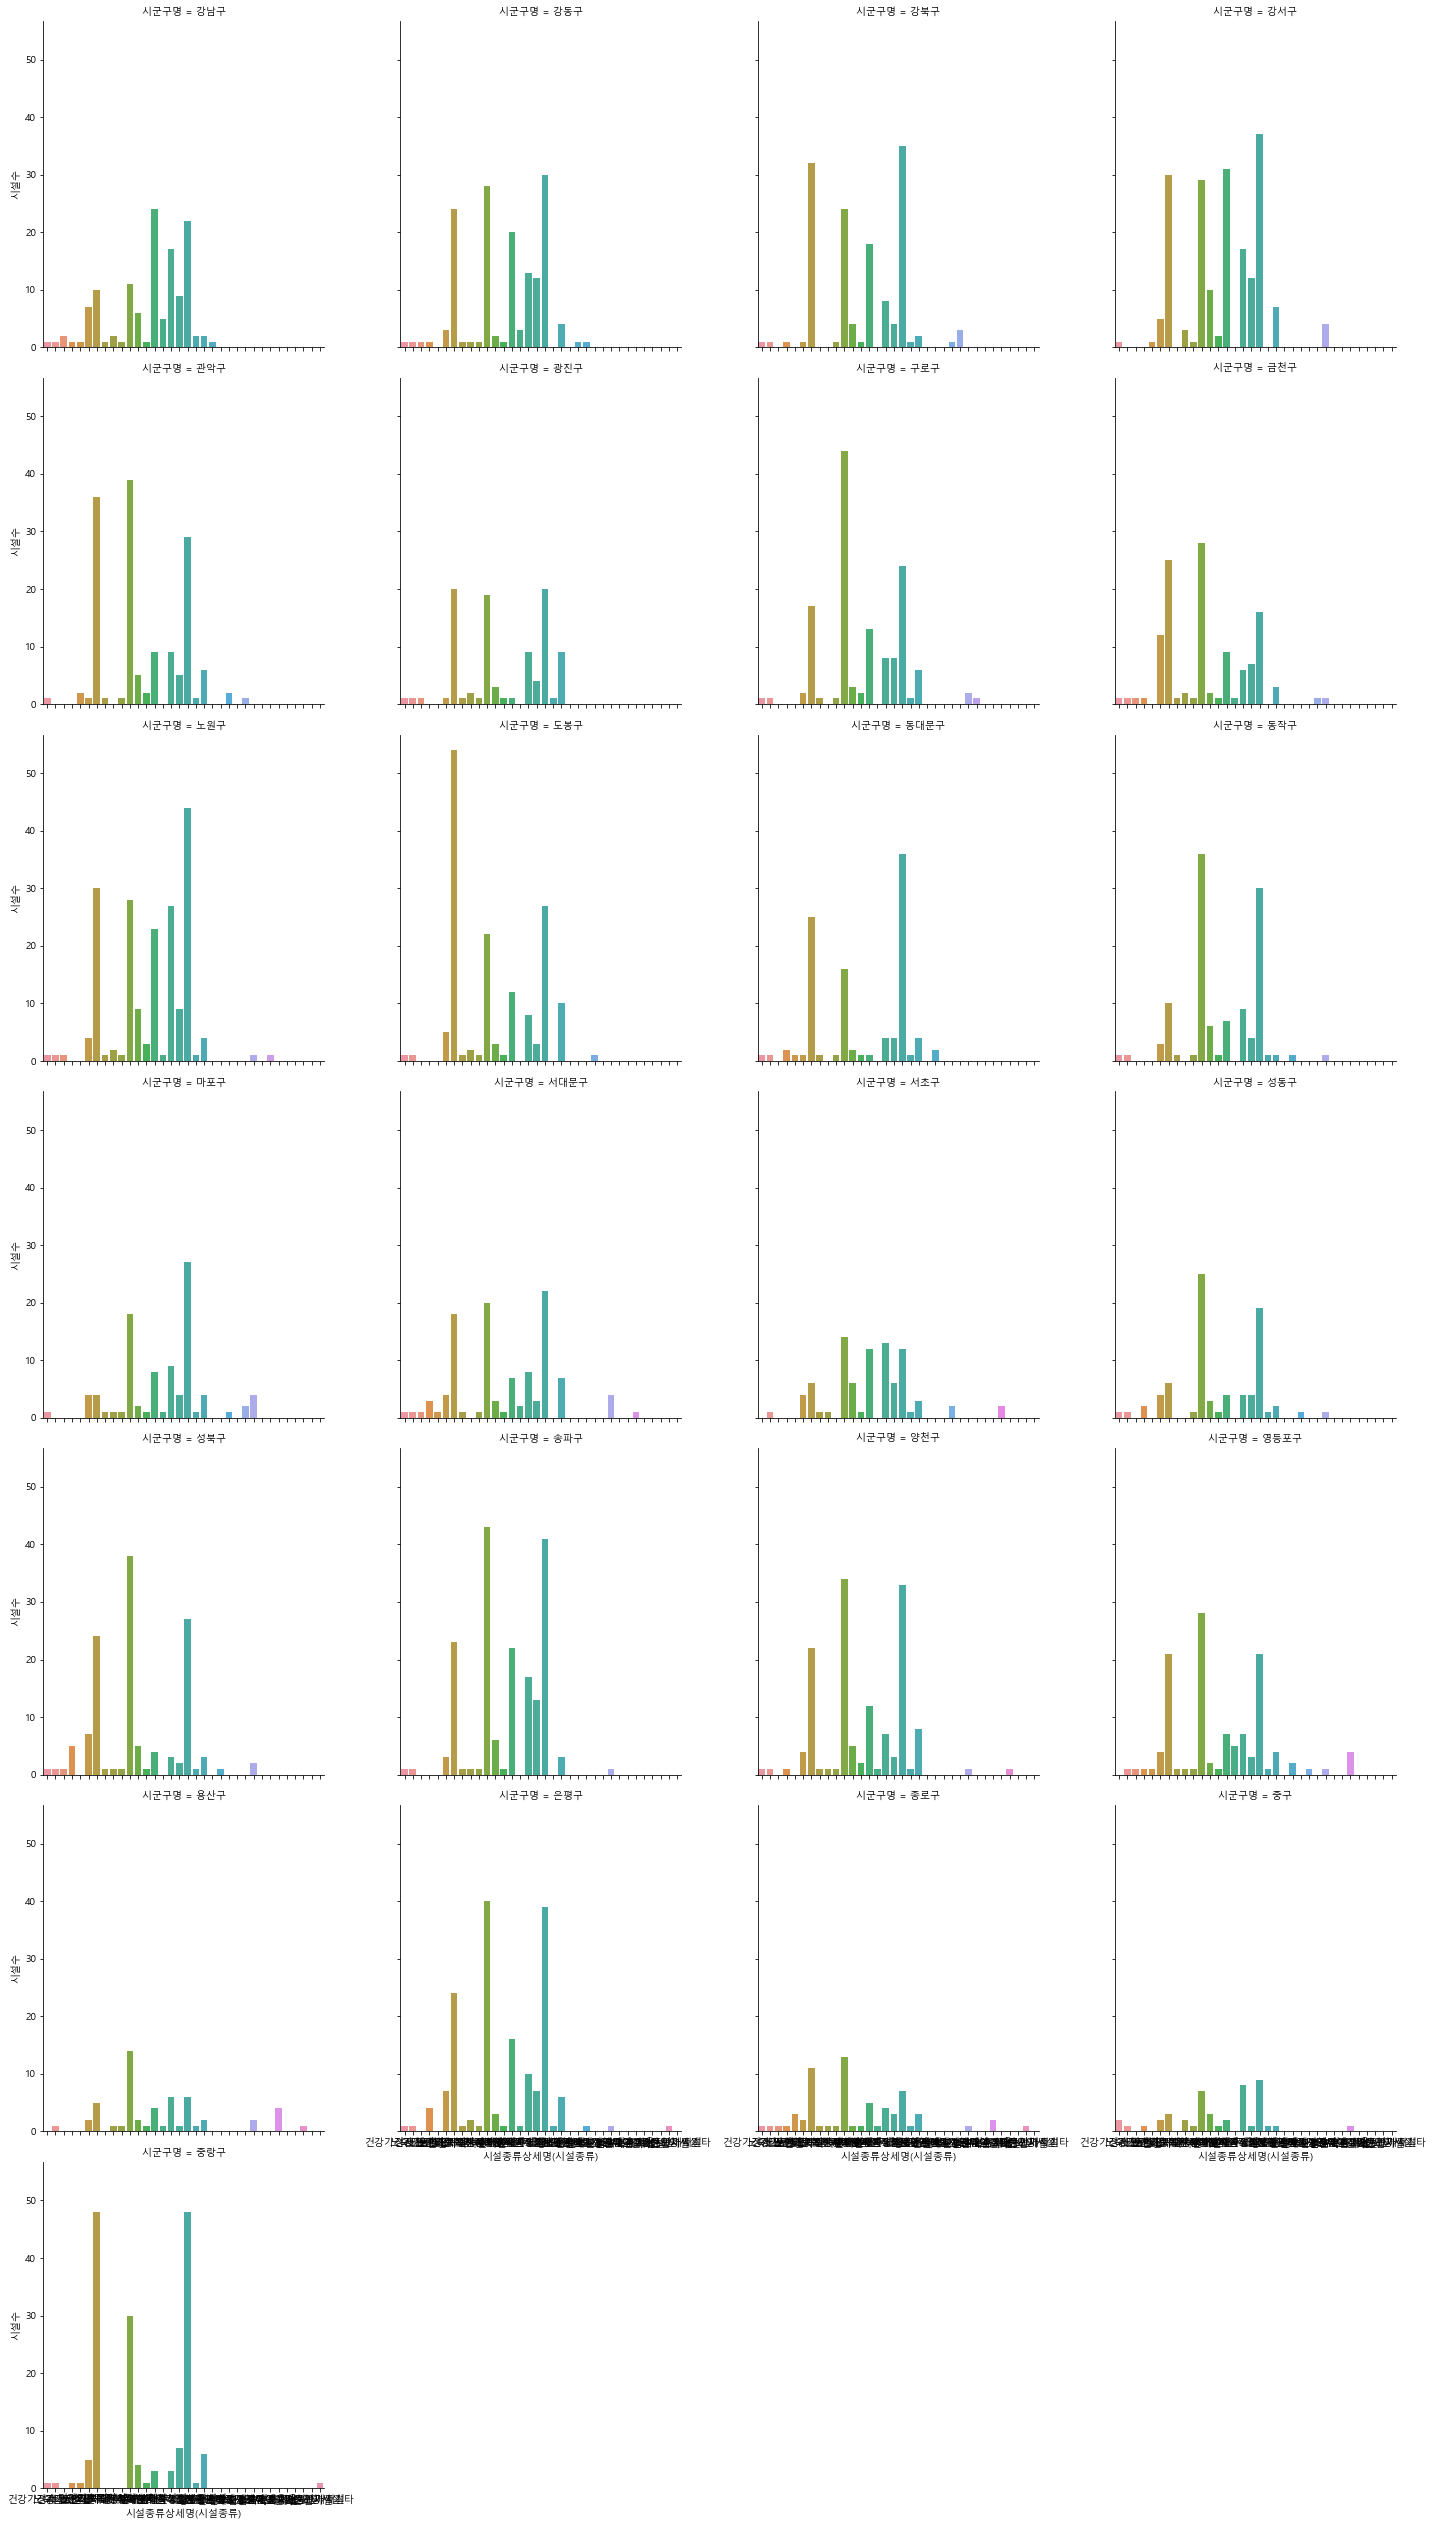

In [106]:
sns.catplot(data=df_t, x='시설종류상세명(시설종류)',y='시설수', kind='bar'
            ,col='시군구명',col_wrap=4)

## 노인/ 장애인으로 구별

### 노인

In [107]:
old= df_old.groupby(['시군구명','시설종류상세명(시설종류)'])['자치구(시)구분'].count()
old

시군구명  시설종류상세명(시설종류)
강남구   노인기타              1
      노인여가복지시설          7
      노인의료복지시설         10
      노인일자리지원기관         1
      노인주거복지시설          2
                       ..
중구    재가노인복지시설          9
중랑구   노인기타              1
      노인여가복지시설          5
      노인의료복지시설         48
      재가노인복지시설         48
Name: 자치구(시)구분, Length: 123, dtype: int64

In [108]:
n= old.reset_index()
df_o= n.rename(columns={'자치구(시)구분':'시설수'})
df_o.head()

,시군구명,시설종류상세명(시설종류),시설수
0,강남구,노인기타,1
1,강남구,노인여가복지시설,7
2,강남구,노인의료복지시설,10
3,강남구,노인일자리지원기관,1
4,강남구,노인주거복지시설,2


<AxesSubplot:xlabel='시설종류상세명(시설종류)', ylabel='시설수'>

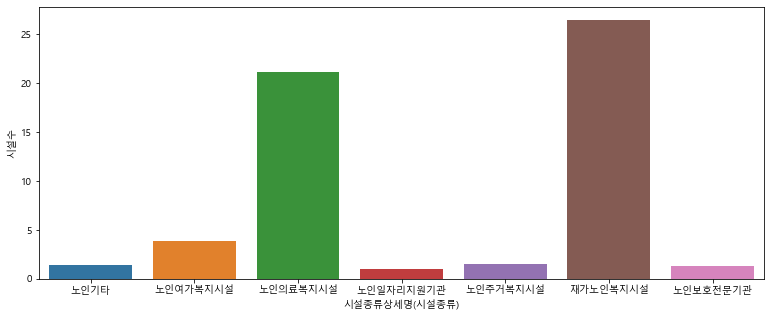

In [109]:
plt.figure(figsize=(13,5))
sns.barplot(data=df_o, x='시설종류상세명(시설종류)',y='시설수',ci=None)

### 장애인

In [110]:
disabled= df_dis.groupby(['시군구명','시설종류상세명(시설종류)'])['자치구(시)구분'].count()
disabled

시군구명  시설종류상세명(시설종류)
강남구   장애인거주시설          24
      장애인기타             5
      장애인지역사회재활시설      17
      장애인직업재활시설         9
강동구   장애인거주시설          20
                       ..
중구    장애인지역사회재활시설       8
      장애인직업재활시설         1
중랑구   장애인거주시설           3
      장애인지역사회재활시설       3
      장애인직업재활시설         7
Name: 자치구(시)구분, Length: 92, dtype: int64

In [111]:
x= disabled.reset_index()
df_d= x.rename(columns={'자치구(시)구분':'시설수'})
df_d.head()

,시군구명,시설종류상세명(시설종류),시설수
0,강남구,장애인거주시설,24
1,강남구,장애인기타,5
2,강남구,장애인지역사회재활시설,17
3,강남구,장애인직업재활시설,9
4,강동구,장애인거주시설,20


<AxesSubplot:xlabel='시설종류상세명(시설종류)', ylabel='시설수'>

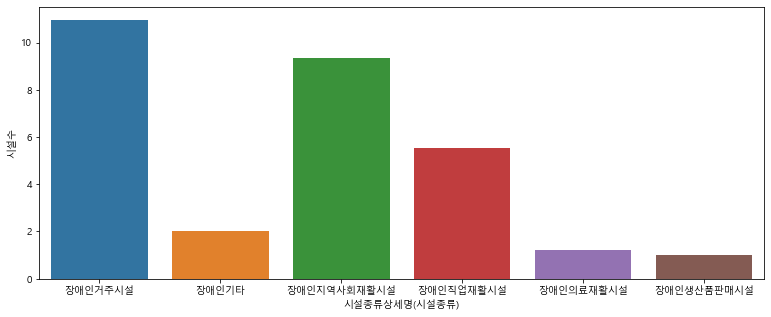

In [112]:
plt.figure(figsize=(13,5))
sns.barplot(data=df_d, x='시설종류상세명(시설종류)',y='시설수',ci=None)

# 지도에 표시

In [123]:
import geopy
# Nominatim 서비스 객체에 대한 핸들러 가져 오기
service = geopy.Nominatim(user_agent = "myGeocoder")
# Nominatim (예 : OSM) 서비스를 사용하여 도시 이름을 지오 코딩합니다.
service.geocode('대한민국')

Location(대한민국, (36.638392, 127.6961188, 0.0))

In [127]:
df.head()

,시설명,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구명,시설주소
0,서울꽃동네신내노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,최은숙,중랑구,서울특별시 중랑구 신내로 194
1,청운양로원,(노인) 양로시설,노인주거복지시설,자치구,이종명,종로구,서울특별시 종로구 비봉길 76
2,청운노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,이종후,종로구,서울특별시 종로구 비봉길 76
3,홍파양로원,(노인) 양로시설,노인주거복지시설,자치구,김우리,노원구,서울특별시 노원구 동일로248길 30
4,천사노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,김샛별,강서구,서울특별시 강서구 강서로45다길 30-22


In [124]:
# 위에서 보고 주소 가져오기
loc_se = service.geocode('서울특별시 중랑구 신내로 194')
#위도
print(loc_se.latitude)
#경도 
print(loc_se.longitude)

37.6000642
127.0970247


In [128]:
m = folium.Map(location = [loc_se.latitude,loc_se.longitude], zoom_start = 15)

folium.Marker(location = [loc_se.latitude,loc_se.longitude],tooltip="서울꽃동네신내노인요양원").add_to(m)


m